# Main Method path invariant

## Imports

In [1]:
import sys
sys.path.append("../../src")
%reload_ext autoreload
%autoreload 2
from helpers import graph
from path_invariants import *
from math import sqrt

## Lower-layer removal method

This method adds all successor graphs without lower-layers. And this is able to understand interleaving, hence, concurrentcy!

In [2]:
A = "pq"
B = "xy"
C = "ABCD"

Log = [
    A, A+B, B, 
    A+B*10, 
    '...' + A + '...' + B,
    C,
    'pxqypxyq'
]

In [3]:
G=successor_graph("")

# For each trace on the log
for T in Log:
    
    # Take his {P} paths based in loop recovery method
    paths = paths_from_trace(T)
    
    # Take his successor graph
    H = successor_graph(T)
    
    # And for every such P, 
    for r, P in paths:
        for i in range(0, len(P)-1):
            if P[1] in P[0]:
                
                # Lower layer is removed from successor graph
                H.remove_edge(P[0],P[1])
                
    # Add merge all resulting graphs            
    G = add_graphs(G, H)

# The invariants is obtained by search paths in connected component for every layer in the resulting graph

invariants=[]
all_weights = set( [G[u][v]["weight"] for u, v in G.edges() ] )
for f in all_weights:
    invariants += paths_in_components( f_layer(f, G) )
    
# The only part now is to assign correct r. If w=r(r+1)/2 ...
# PENDING

In [4]:
invariants

[(1, ['A', 'B', 'C', 'D']), (7, ['p', 'q']), (61, ['x', 'y'])]

In the combined successor graph for all traces in the logs, the f-layers are the following

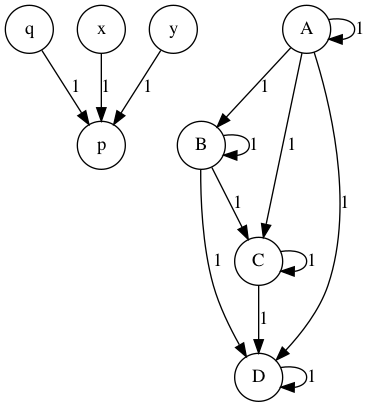

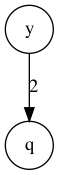

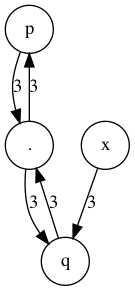

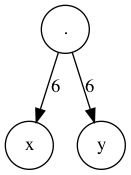

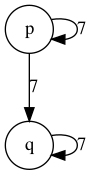

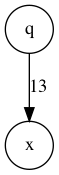

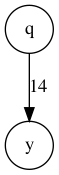

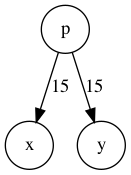

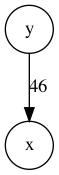

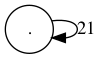

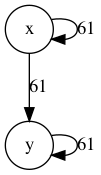

In [5]:
for f in all_weights:
    graph( f_layer(f, G) )

## Direct method, assuming replacing loops but multi paths

If no interleaving is present, just path concatenation, the method of search loops and adds the equivalent rPaths is enough.

In [6]:
A = "pq"
B = "xy"
C = "ABCD"

Log = [
    A, A+B, B, 
    A+B*10, 
    '...' + A + '...' + B,
    C
]

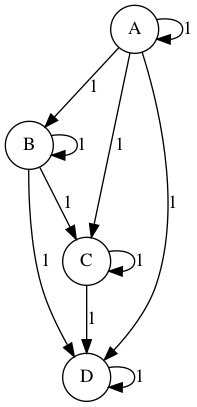

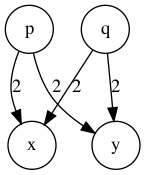

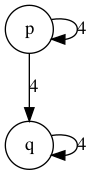

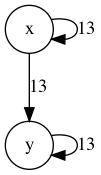

[(1, ['A', 'B', 'C', 'D']), (4, ['p', 'q']), (13, ['x', 'y'])]

In [7]:
G=successor_graph("")
for T in Log:
    paths = paths_from_trace(T)
    
    # Here I sum the multi path graph
    for r, P in paths:
        for i in range(0,int(r)):
            G = add_graphs(G, successor_graph(P) )
        
# Search paths in every layer
weights = set( [G[u][v]["weight"] for u, v in G.edges() ] )

for f in weights:
    graph( f_layer(f, G) )

invariants=[]
for f in weights:
    invariants += paths_in_components( f_layer(f, G) )
    
invariants

This method works well ONLY if it contains complete paths without symbols in the middle, otherwise it fails. See what happens here:

In [8]:
A = "pq"
B = "xy"
C = "ABCD"

Log = [
    A, A+B, B, 
    A+B*10, 
    '...' + A + '...' + B,
    C,
    'pxqypxyq'
]

In [9]:
Log.append("pqxy")

G=successor_graph("")
for T in Log:
    paths = paths_from_trace(T)
    
    # Here I sum the multi path graph
    for r, P in paths:
        for i in range(0,int(r)):
            G = add_graphs(G, successor_graph(P) )
        
# Search paths in every layer
weights = set( [G[u][v]["weight"] for u, v in G.edges() ] )

# for f in weights:
#     graph( f_layer(f, G) )

invariants=[]
for f in weights:
    invariants += paths_in_components( f_layer(f, G) )
    
invariants

[(1, ['A', 'B', 'C', 'D'])]